In [3]:
import torch

In [12]:
pth_path = "../../Data/BNN_weight/for quantize_3layer_256_89.pth"
# pth_path = "../../Data/NN_weight/LeNet5_MNIST.pth"
ckpt = torch.load(pth_path, map_location="cpu", weights_only=True)
state = ckpt.get("state_dict", ckpt)  # 若含 state_dict 则取出

for k, v in state.items():
    print(f"{k:30} → shape: {tuple(v.shape)}")

conv_entry.weight              → shape: (32, 3, 3, 3)
conv_entry.bias                → shape: (32,)
bn_entry.weight                → shape: (32,)
bn_entry.bias                  → shape: (32,)
bn_entry.running_mean          → shape: (32,)
bn_entry.running_var           → shape: (32,)
bn_entry.num_batches_tracked   → shape: ()
dsc_conv1_1.depth_conv.weight  → shape: (32, 1, 3, 3)
dsc_conv1_1.depth_conv.bias    → shape: (32,)
dsc_conv1_1.depth_bn.weight    → shape: (32,)
dsc_conv1_1.depth_bn.bias      → shape: (32,)
dsc_conv1_1.depth_bn.running_mean → shape: (32,)
dsc_conv1_1.depth_bn.running_var → shape: (32,)
dsc_conv1_1.depth_bn.num_batches_tracked → shape: ()
dsc_conv1_1.point_conv.weight  → shape: (64, 32, 1, 1)
dsc_conv1_1.point_conv.bias    → shape: (64,)
dsc_conv1_1.point_bn.weight    → shape: (64,)
dsc_conv1_1.point_bn.bias      → shape: (64,)
dsc_conv1_1.point_bn.running_mean → shape: (64,)
dsc_conv1_1.point_bn.running_var → shape: (64,)
dsc_conv1_1.point_bn.num_batches_tracked 

In [104]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colormaps
from matplotlib.colors import ListedColormap

def generate_nd_histogram(data, dim):
    plt.clf()
    fig = plt.figure(figsize=(7, 5))
    alpha = 0.85  # 透明度统一设定

    if dim == 1:
        plt.hist(data, bins=30, color='steelblue', edgecolor='black', linewidth=0.8)
        plt.xlabel("Value", fontsize=12)
        plt.ylabel("Count", fontsize=12)
        plt.title("1D Histogram", fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.6)

    elif dim == 2:
        if data.ndim == 1 or data.shape[1] < 2:
            print("Need at least 2D data for 2D histogram.")
            return
        x, y = data[:, 0], data[:, 1]
        hist = plt.hist2d(x, y, bins=60, cmap='Blues')  # 蓝色渐变
        plt.xlabel("X", fontsize=12)
        plt.ylabel("Y", fontsize=12)
        plt.title("2D Histogram", fontsize=14)
        plt.colorbar(hist[3], label="Frequency")
        plt.grid(True, linestyle='--', alpha=0.4)

    elif dim == 3:
        if data.ndim == 1 or data.shape[1] < 3:
            print("Need at least 3D data for 3D histogram.")
            return
    
        ax = fig.add_subplot(111, projection='3d')
        x, y, z = data[:, 0], data[:, 1], data[:, 2]
    
        # Histogram binning
        bins = 20
        hist, edges = np.histogramdd((x, y, z), bins=bins)
        x_edges, y_edges, z_edges = edges
    
        # Bin centers
        x_centers = (x_edges[:-1] + x_edges[1:]) / 2
        y_centers = (y_edges[:-1] + y_edges[1:]) / 2
        z_centers = (z_edges[:-1] + z_edges[1:]) / 2
    
        # Create grid of bin centers
        Xc, Yc, Zc = np.meshgrid(x_centers, y_centers, z_centers, indexing='ij')
        values = hist.flatten()
        Xc = Xc.flatten()
        Yc = Yc.flatten()
        Zc = Zc.flatten()
    
        # Filter non-zero bins
        nonzero = values > 0
        Xc, Yc, Zc, values = Xc[nonzero], Yc[nonzero], Zc[nonzero], values[nonzero]
    
        # Normalize for color
        norm_values = values / np.max(values)
        colors = plt.cm.viridis(norm_values)
    
        blues = colormaps['Blues']
        newcolors = blues(np.linspace(0.12, 1, 256))
        custom_blues = ListedColormap(newcolors)
        # 3D scatter with color
        sc = ax.scatter(Xc, Yc, Zc, c=norm_values, cmap=custom_blues, s=20, alpha=0.8)

    
        # Labels
        ax.set_xlabel("X", fontsize=10)
        ax.set_ylabel("Y", fontsize=10)
        ax.set_zlabel("Z", fontsize=10)
        ax.set_title("3D Density Histogram", fontsize=13)
    
        ax.view_init(elev=25, azim=135)
        ax.set_box_aspect([1, 1, 1])
        fig.colorbar(sc, ax=ax, shrink=0.6, label="Frequency")


    else:
        print("Unsupported dimension:", dim)
        return

    fig.tight_layout()
    plt.show()  # 或改成保存图：plt.savefig("path.svg")


    # fig.savefig(filepath, format='svg')
    # plt.close(fig)


<Figure size 640x480 with 0 Axes>

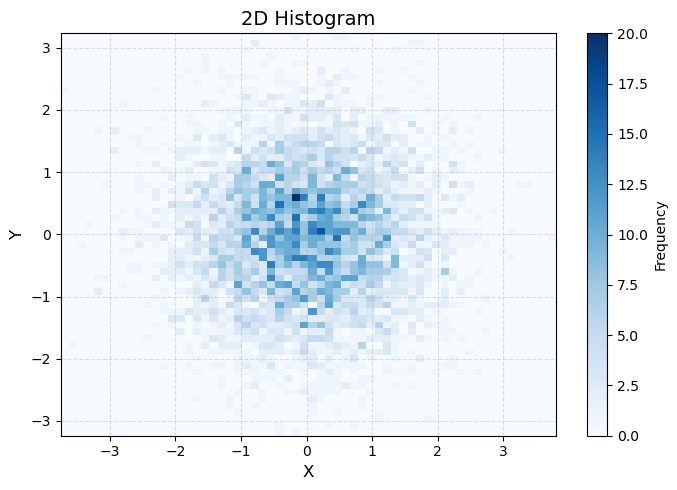

In [27]:
demo_data = np.random.randn(5000, 2)  # Example data for testing
number = 2  # Dimension of the histogram
# nd_hist_fname = f"nd_histogram.svg"
generate_nd_histogram(demo_data, number)

<Figure size 640x480 with 0 Axes>

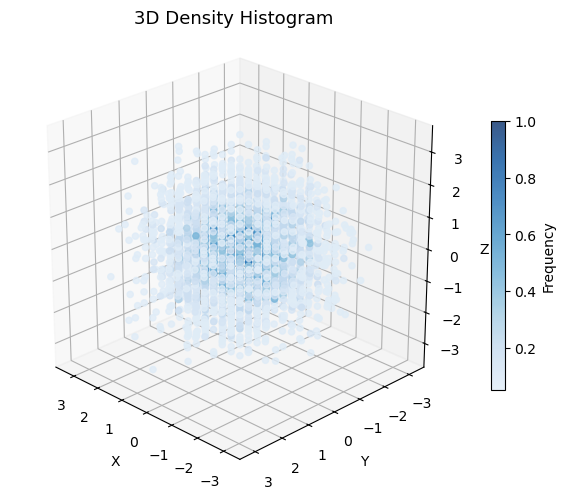

In [105]:
demo_data = np.random.randn(5000, 3)  # Example data for testing
number = 3  # Dimension of the histogram
# nd_hist_fname = f"nd_histogram.svg"
generate_nd_histogram(demo_data, number)

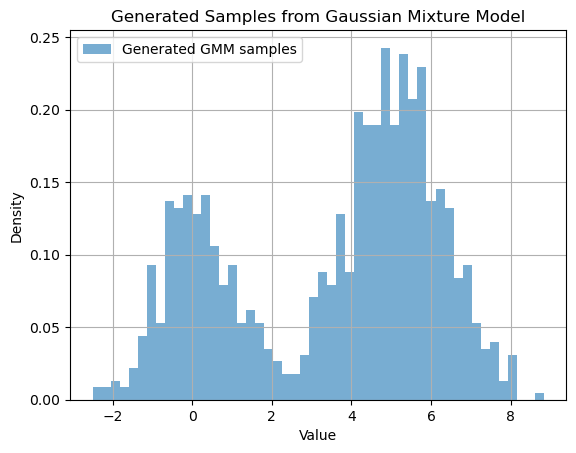

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# 参数设置
weights = [0.3, 0.7]  # 混合权重，和为1
means = [0, 5]        # 每个高斯分布的均值
stds = [1, 1.2]       # 每个高斯分布的标准差
n_samples = 1000      # 总样本数

# 按照权重选择成分
components = np.random.choice([0, 1], size=n_samples, p=weights)

# 根据选择的成分从相应高斯分布中采样
samples = np.array([
    np.random.normal(loc=means[c], scale=stds[c])
    for c in components
])

# 可视化生成的GMM数据
plt.hist(samples, bins=50, density=True, alpha=0.6, label="Generated GMM samples")
plt.title("Generated Samples from Gaussian Mixture Model")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()
